In [118]:
import pandas as pd  
import openpyxl  
import jieba.posseg as pseg
import tqdm
import wordcloud
from wordcloud import WordCloud 
import matplotlib.pyplot as plt  
import matplotlib.colors as colors
import copy
from pathlib import Path
def df_to_dict(df:pd.DataFrame):
    columns=df.columns[1:]
    r=[{} for i in range(len(df))]
    for i in range(len(df)):
        for u in columns:
            r[i][u]=df[u][i]
    return r
import re 
def clean_text(text:str):
    clean_text = text.replace('\u3000','')
    clean_text = re.sub(r'<.*?>', '', clean_text)
    return clean_text
text=""
for article in articles:
    try:
        text+=clean_text(article['content'])
    except:
        continue 

### 生成词性字典

In [70]:
def generate_flag(text,flag):
    words=pseg.cut(text)
    words_frequency={}
    for word in (words):
        if(flag!=None):
            if(word.flag in flag):
                try:
                    words_frequency[word.word]+=1
                except Exception as e:
                    words_frequency[word.word]=1
        else:
            try:
                words_frequency[word.word]+=1
            except Exception as e:
                words_frequency[word.word]=1
    return words_frequency

### 生成柱状图

In [195]:
def generate_histogram(word_frequency,title:str,num=20):#生成柱状图  
    plt.rcParams['font.sans-serif'] = ['KaiTi']
    filtered_dict = {key: value for key, value in word_frequency.items() if len(key) > 1}
    sorted_words = sorted(filtered_dict.items(), key=lambda x: x[1],reverse=True)
    categories=[i[0] for i in sorted_words[:num]]
    values=[i[1] for i in sorted_words[:num]]
    values.reverse()
    categories.reverse()
    plt.figure(figsize=(9,6))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.barh(categories,values,color='skyblue')
    plt.xlabel("频次")
    plt.ylabel("关键词")
    plt.savefig(fname='./'+title+'柱状图.png')
    plt.show()

### 生成饼图

In [197]:
def generate_pie(word_frequency,title,num=10):#生成饼图
    plt.rcParams['font.sans-serif'] = str(Path('KaiTi'))
    filtered_dict = {key: value for key, value in word_frequency.items() if len(key) > 1}
    sorted_words = sorted(filtered_dict.items(), key=lambda x: x[1],reverse=True)
    categories=[i[0] for i in sorted_words[:num]]
    tmp_sum=sum([i[1] for i in sorted_words[:num]])
    values=[i[1]/tmp_sum for i in sorted_words[:num]]
    plt.figure(figsize=(9,6))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.pie(values,explode=[0 for i in range(len(values))],labels=categories,autopct='%1.1f%%',shadow=False,startangle=140)
    plt.axis('equal')
    plt.savefig(fname='./'+title+'饼图.png')
    plt.show()

### 生成词云

In [198]:
def generate_cloud(word_frequency,title):#生成词云
    word_cloud=WordCloud(width=1600,height=800,background_color='white',font_path='/home/wangxv/Downloads/font1.ttf').generate_from_frequencies(word_frequency)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off') 
    plt.savefig(fname='./'+title+'词云.png')

### 读取数据

In [119]:
df=pd.read_excel('./articles.xlsx')
articles=df_to_dict(df)

In [120]:
articles[:1]

[{'title': '金融赋能<em>乡村</em><em>振兴</em>',
  'time': np.float64(1701470344000.0),
  'id': np.float64(1000040130210.0),
  'label': '#经济·科技#',
  'description': '万四乔所说的项目是在建的“花开十月”<em>乡村</em>度假区项目。近年来，基于丰富的乡土人文景观、便利的区位交通等优势，云梦县积极探索将十月村打造为农文旅融合示范样板。\u3000\u3000得知消息后，湖北省市县农行三级联动，组成业务骨干专班，多次到村里开展调研，并为其发放全市首笔“和美<em>乡村</em>贷”200万元。\u3000\u3000据介绍，“和美<em>乡村</em>贷”是农行湖北省分行将支持农村集体经济作为支持和美<em>乡村</em>建设的重要抓手，为相关公司等量身定制的融资产品。今年以来，农行湖北省分行已在240个和美<em>乡村</em>试点村推进金融服务，授信余额超7亿元。截至今年10月，农行湖北省分行涉农贷款余额近2600亿元，贷款比今年初净增近430亿元。\u3000\u3000近年来，湖北省有关银行积极扶持农村产业，助力和美<em>乡村</em>建设，为<em>乡村</em>发展注入金融活水。\u3000\u3000',
  'author': '牛镛',
  'source': '人民网－人民日报',
  'url': 'http://finance.people.com.cn/n1/2023/1202/c1004-40130210.html',
  'content': '\u3000\u3000“感谢支持，我们一定把这个项目做好！”收到200万元资金，湖北省云梦县伍洛镇十月村党支部书记万四乔说。\u3000\u3000万四乔所说的项目是在建的“花开十月”乡村度假区项目。近年来，基于丰富的乡土人文景观、便利的区位交通等优势，云梦县积极探索将十月村打造为农文旅融合示范样板。\u3000\u3000由于建设工程多、投入较大，项目出现资金缺口。得知消息后，湖北省市县农行三级联动，组成业务骨干专班，多次到村里开展调研，并为其发放全市首笔“和美乡村贷”200万元。\u3000\u3000据介绍，“和美乡村贷”是农行湖北省分行将

### 分析数据来源

#### 清洗数据

### 机构名称

In [78]:
dict1=generate_flag(text,['nt'])

In [172]:
f=open('../nt.txt','r')
keys=f.readlines()
keys=[i.replace('\n','') for i in keys]
dict1={key: dict1[key] for key in dict1 if key not in keys}

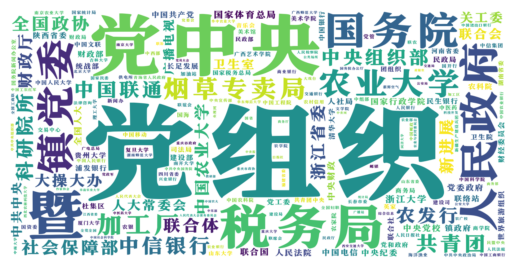

In [199]:
generate_cloud(dict1,'机构名称分析(政府门户网站)')

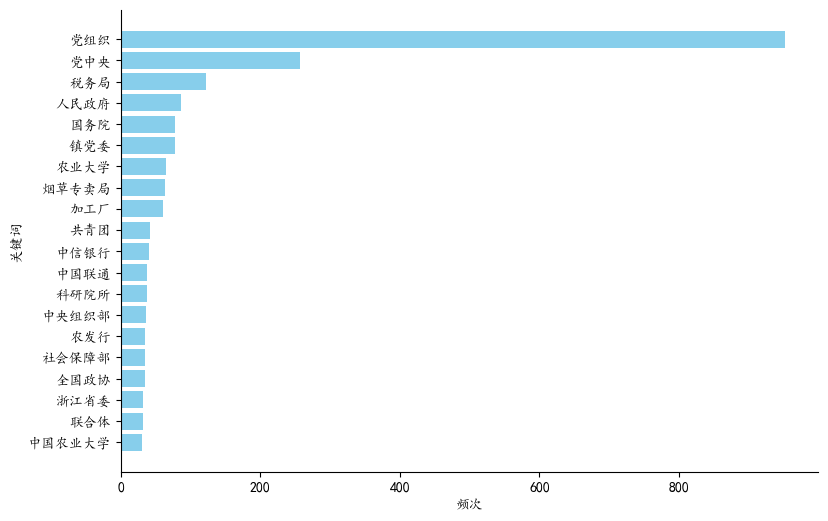

In [200]:
generate_histogram(dict1,'机构名称分析(政府门户网站)')

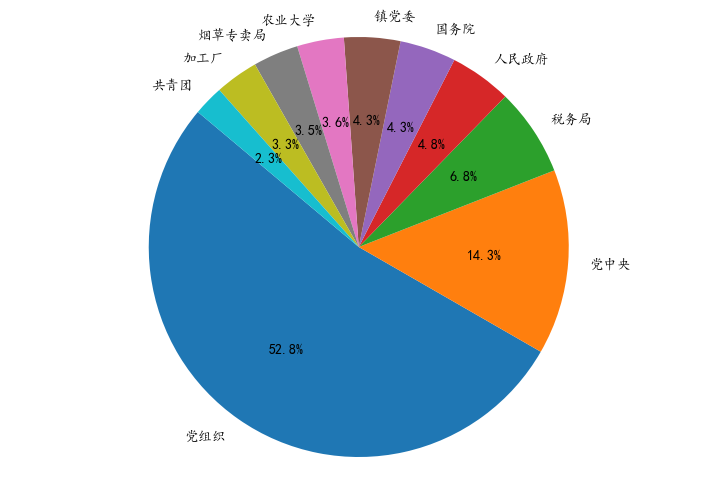

In [201]:
generate_pie(dict1,'机构名称分析(政府门户网站)')

### 形容词

In [175]:
dict2=generate_flag(text,['a','ad'])

In [180]:
f=open('../adj.txt','r')
keys=f.readlines()
keys=[i.replace('\n','') for i in keys]
dict2={key: dict2[key] for key in dict2 if key not in keys  and len(key)>=2}

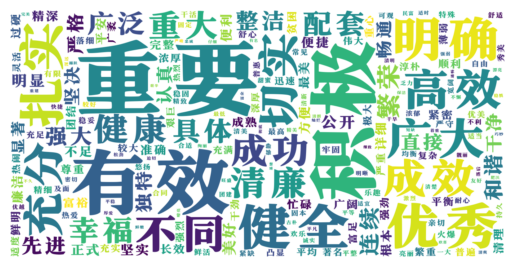

In [202]:
generate_cloud(dict2,'形容词分析(政府门户网站)')

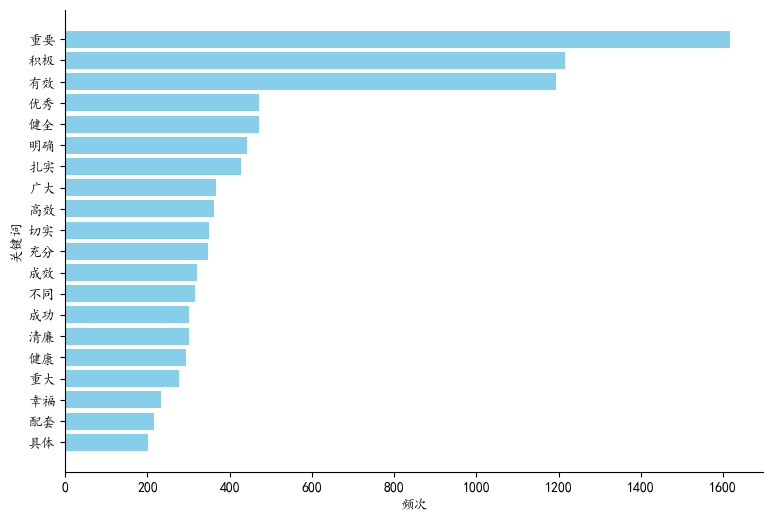

In [203]:
generate_histogram(dict2,'形容词分析(政府门户网站)')

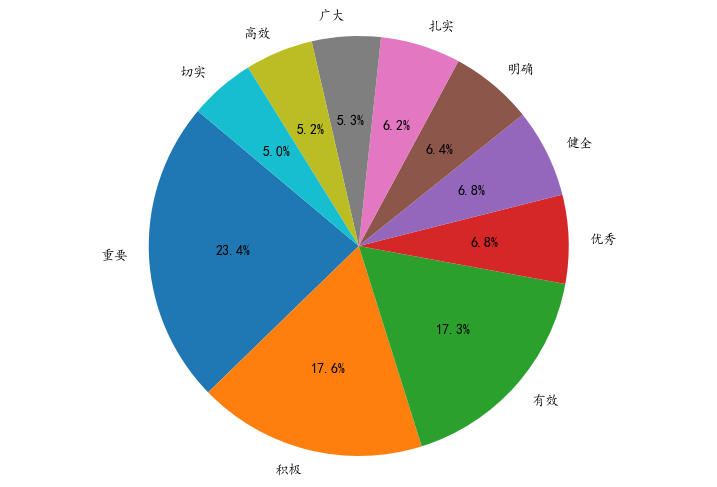

In [204]:
generate_pie(dict2,'形容词分析(政府门户网站)')

### 动词分析

In [87]:
dict3=generate_flag(text,['v','vf','vd','vn'])

### 过滤常用词

In [205]:
f=open('../verb.txt','r')
keys=f.readlines()
keys=[i.replace('\n','') for i in keys]
dict3={key: dict3[key] for key in dict3 if key not in keys  and len(key)>=2}

In [206]:
add_lines=[i.replace('\n','') for i in open('../verb_add.txt','r').readlines()]
add_lines
for key in add_lines:
    try:
        dict3[key]+=2500
    except:
        dict3[key]=2500

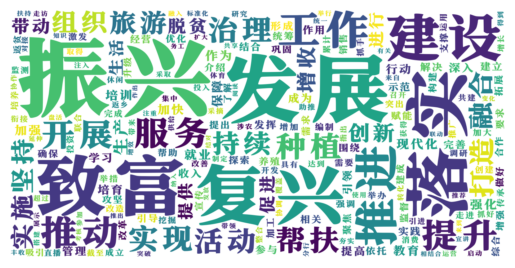

In [207]:
generate_cloud(dict3,'动词分析(政府门户网站)')

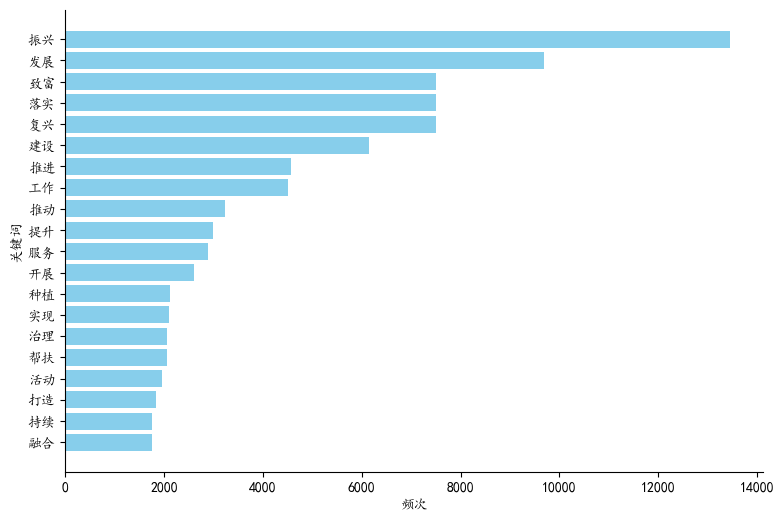

In [208]:
generate_histogram(dict3,'动词分析(政府门户网站)')

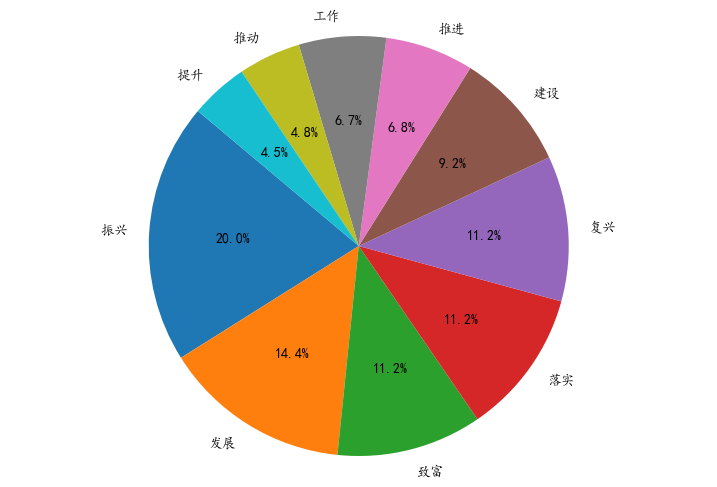

In [209]:
generate_pie(dict3,"动词分析(政府门户网站)")

### 情感分析

In [93]:
import datetime
df=pd.read_excel('./articles.xlsx')
dict_time=df_to_dict(df)

In [94]:
import re
def get_time():
    return datetime.datetime.fromtimestamp(int(dict_time[0]['time'])/1000)
def clean_text(text:str):
    try:
        clean_text = text.replace('\u3000','')
        clean_text = re.sub(r'<.*?>', '', clean_text)
    except Exception as e:
        return ""
    return clean_text
def to_int(time):
    try:
        return int(time/1000)
    except Exception as e:
        return 16051332

In [95]:
import jieba
from snownlp import SnowNLP
def get_sentiment(text):
    word_list=pseg.lcut(text)
    text=''
    num=0
    out_num=0
    avg=0
    for word,flag in word_list:
        num+=1
        text=text+('' if len(text)==0 else ' ')+word
        if(num==20):
            out_num+=1
            num=0
            sn=SnowNLP(text)
            text=''
            avg+=sn.sentiments
    return 0.5 if out_num==0 else avg/out_num
def get_sentiment_time(text_time):
    times=[]
    sentiments=[]
    for i in text_time:
        if(i['time']==16051332 or i['content']==""):
            continue
        times.append(i['time'])
        sentiments.append(get_sentiment(i['content']))
    plt.plot(times,sentiments)
    plt.show()

### 饼图情感分析

In [96]:
emotions=[]
for ind in range(len(articles)):
    print('\r '+str(ind+1)+"/"+str(len(articles)),end='')
    emotions.append(get_sentiment(clean_text(articles[ind]['content'])))

 2000/2000

In [210]:
def emotion_pie(emotions,title):
    emotions=[i for i in emotions if i!=0.5]
    positive=[i for i in emotions if i>=0.67]
    neutral=[i for i in emotions if i<0.67 and i>0.33]
    negative=[i for i in emotions if i<=0.33]
    plt.rcParams['font.sans-serif'] = ['Kaiti']
    labels=['积极情绪','中立情绪','消极情绪']
    values=[int(100*len(positive)/len(emotions)),int(100*len(neutral)/len(emotions)),100-int(100*len(positive)/len(emotions))-int(100*len(neutral)/len(emotions))]
    plt.figure(figsize=(9,6))
    plt.pie(values,explode=[0.1,0,0],labels=labels,autopct='%1.1f%%',shadow=False,startangle=140)
    plt.savefig('政府门户网站情感分析.png')
    plt.show()

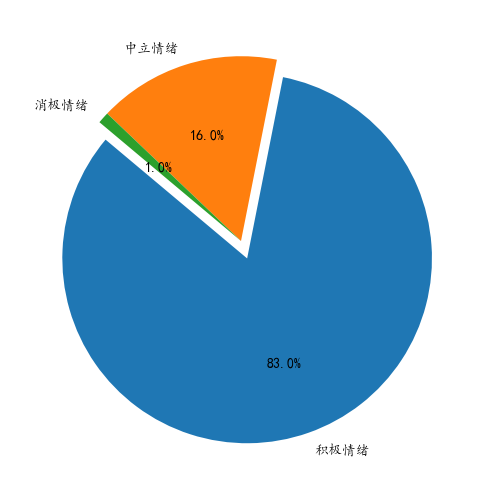

In [211]:
emotion_pie(emotions,'政府门户网站情感分析')

### 整体词频分析

In [99]:
dict4=generate_flag(text,['v','vf','vd','vn','a','ad','nt'])
f=open('../verb.txt','r')
keys=f.readlines()
keys=[i.replace('\n','') for i in keys]
dict4={key: dict4[key] for key in dict4 if key not in keys}
f=open('../adj.txt','r')
keys=f.readlines()
keys=[i.replace('\n','') for i in keys]
dict4={key: dict4[key] for key in dict4 if key not in keys}
add_lines=[i.replace('\n','') for i in open('../verb_add.txt','r').readlines()]
add_lines
for key in add_lines:
    try:
        dict4[key]+=2500
    except:
        dict4[key]=2500

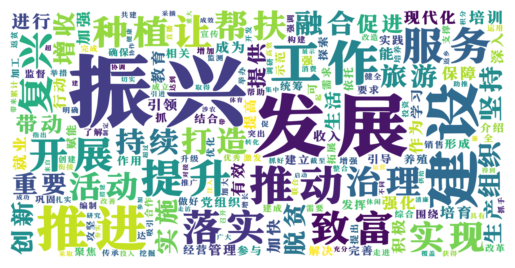

In [212]:
generate_cloud(dict4,'整体词频')

### 整体词性

In [101]:
def all_part(text):
    words=pseg.cut(text)
    words_frequency = {
    '名词': 0,
    '动词': 0,
    '形容词': 0,
    '副词': 0,
    '成语': 0,
    '助词': 0,
    '连词': 0,
    '介词': 0,
    '数词': 0,
    '量词': 0,
    '时间词': 0,
    '方位词': 0,
    '人名': 0,
    '地名': 0,
    '机构团体名': 0,
    '专业术语': 0,
    '标点符号': 0,
    '代词': 0,
    '叹词': 0,
    '语气词': 0,
    '非语素字': 0,
    '未登录词': 0,
    '其他': 0,
    }
    for word in words:  # 假设text是你的输入文本
        flag = word.flag
        if flag in ['n', 'nr', 'ns', 'nt', 'nz']:
            words_frequency['名词'] += 1
        elif flag in ['v', 'vf', 'vd', 'vn']:
            words_frequency['动词'] += 1
        elif flag in ['a', 'ad']:
            words_frequency['形容词'] += 1
        elif flag in ['d']:
            words_frequency['副词'] += 1
        elif flag in ['i']:
            words_frequency['成语'] += 1
        elif flag in ['u']:
            words_frequency['助词'] += 1
        elif flag in ['c']:
            words_frequency['连词'] += 1
        elif flag in ['p']:
            words_frequency['介词'] += 1
        elif flag in ['m']:
            words_frequency['数词'] += 1
        elif flag in ['q']:
            words_frequency['量词'] += 1
        elif flag in ['t']:
            words_frequency['时间词'] += 1
        elif flag in ['f']:
            words_frequency['方位词'] += 1
        elif flag in ['j']:
            words_frequency['专业术语'] += 1
        elif flag in ['x']:
            continue
        elif flag in ['r']:
            words_frequency['代词'] += 1
        elif flag in ['e']:
            words_frequency['叹词'] += 1
        elif flag in ['o']:
            words_frequency['语气词'] += 1
        else:
            words_frequency['其他'] += 1
    return words_frequency

In [102]:
all_dict=all_part(text)

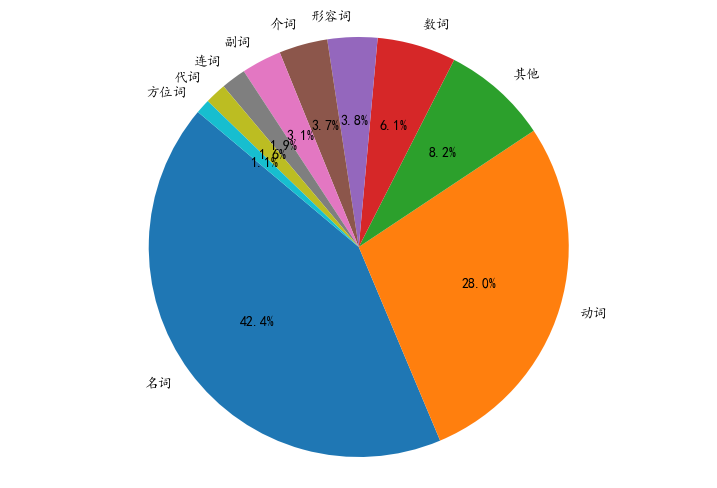

In [213]:
generate_pie(all_dict,'整体词性分析')

### 分析数据来源

In [192]:
news_num=0
passage_num=0
label_num={'要闻/政策':0,'文章':0}
source_num={}
for ind in range(len(articles)):
    articles[ind]['title']
    if(articles[ind]['source'] in source_num):
        source_num[articles[ind]['source']]+=1
    else:
        source_num[articles[ind]['source']]=1
    try:
        if("要闻" in articles[ind]['label'] or "政" in articles[ind]['label']):
            label_num['要闻/政策']+=1
        else:
            label_num['文章']+=1
    except Exception as e:
        continue
news=[]
def check_elements_in_string(lst, string):
    for item in lst:
        if item in string:
            return True
    return False
judges = [
    '北京', '天津', '河北', '山西', '内蒙古',
    '辽宁', '吉林', '黑龙江', '上海', '江苏',
    '浙江', '安徽', '福建', '江西', '山东',
    '河南', '湖北', '湖南', '广东', '广西',
    '海南', '重庆', '四川', '贵州', '云南',
    '西藏', '陕西', '甘肃', '青海', '宁夏',
    '新疆', '香港', '澳门' ,'中央', '国家',
    '政府', '新华'
]
for ind in range(len(articles)):
    try:
        if(check_elements_in_string(judges,articles[ind]['source'])):
            news.append(copy.deepcopy(articles[ind]))
            del news[len(news)-1]['id']
            del news[len(news)-1]['label']
            del news[len(news)-1]['author']
            del news[len(news)-1]['url']
            del news[len(news)-1]['content']
            del news[len(news)-1]['description']
            news[len(news)-1]['序号']=len(news)
            try:
                news[len(news)-1]['title']=clean_text(news[len(news)-1]['title'])
            except Exception as e:
                news[len(news)-1]['title']=''
            try:
                news[len(news)-1]['time']=str(datetime.datetime.fromtimestamp(int(news[len(news)-1]['time']/1000))).split(' ')[0]
            except Exception as e:
                news[len(news)-1]['time']=''
            try:
                s=clean_text(news[len(news)-1]['source']).replace('——','').replace("人民网",'').replace('-','').replace('频道','').replace('－','').replace('日报','')
                if ('政府' not in s and '网' not in s):
                    s+='政府网站'
                news[len(news)-1]['source']=s

            except Exception as e:
                news[len(news)-1]['source']=''
            news[len(news)-1]['标题']=news[len(news)-1]['title']
            del news[len(news)-1]['title']
            news[len(news)-1]['来源']=news[len(news)-1]['source']
            del news[len(news)-1]['source']
            news[len(news)-1]['时间']=news[len(news)-1]['time']
            del news[len(news)-1]['time']
    except Exception as e:
        continue
news[:2]
df=pd.DataFrame(news)
df.to_excel('./show.xlsx')